# Packages and helper functions for creating graph of cities in Europe

In [1]:
import geopy

from geopy.geocoders import Nominatim
from geopy import distance

geolocator = Nominatim(user_agent="robbe.claeys@gmail.com")

def limit_locations_EU(locations):
    lat_min, lat_max = 35.8, 72
    long_min, long_max = -11, 36
    return [location for location in locations if lat_min <= location.latitude <= lat_max and long_min <= location.longitude <= long_max][0]

def get_country_long_lat(city):
    locations = geolocator.geocode(city, exactly_one=False)
    # print(locations)
    if len(locations) > 1:
        location = limit_locations_EU(locations)
        # print(location)
    else:
        location = locations[0]
    country = location.address.split(",")[-1].strip()
    return (country, location.latitude, location.longitude)

def get_distance(geo1, geo2):
    return distance.distance(geo1, geo2).km

get_country_long_lat("Praha")

('Česko', 50.0596288, 14.446459273258009)

In [2]:
def time_to_minutes(time):
    hours, minutes = time.split(":")
    return int(hours) * 60 + int(minutes)

time_to_minutes("8:30")

510

In [3]:
import pandas as pd

airport = pd.read_csv("./data/airport/airports.csv")
airport = airport[airport["type"] == "large_airport"]
airport = airport[airport["continent"] == "EU"]

def is_airport(geo_city, geo_airport, max_distance=40):
    distance = get_distance(geo_city, geo_airport)
    if distance <= max_distance:
        return True

def get_airport(lat, long):
    geo_city = (lat, long)
    for i, row in airport.iterrows():
        geo_airport = (row["latitude_deg"], row["longitude_deg"])
        if is_airport(geo_city, geo_airport):
            return row["iata_code"]
        
    return None

# Manually created list of cities in Europe and their connections

In [4]:
cities = [
    # Ireland
    "Westport","Belfast","Dublin","Cork",
    # Londonderry, Dundalk, Sligo, Ballina, Athlone, Athenry, Galway,
    # Limerick, Ballyprophy, Dun Laoghaire, Limerick Junction, Kilkenny,
    # Tralee, Killarney, Mallow, Waterford, Wexford, Rosslare Harbour,

    # UK
    "Aberdeen","Glasgow","Edinburgh","York","London","Holyhead","Birmingham","Bristol","Penzance",

    # Belgium
    "Brussels",

    # Netherlands
    "Amsterdam",

    # France
    "Paris","Rennes","Lyon","Bordeaux","Montpellier","Hendaye","Marseille","Nice",

    # Spain
    "Madrid","Barcelona","Valencia","Pamplona","Santander","Santiago","Sevilla","Vigo", "Granada", "Malaga",

    # Portugal
    "Lisbon","Porto","Faro",

    # Italy
    "Rome", "Milan", "Genova", "Bologna", "Firenze", "Napoli","Bari", "Catania", "Venezia",

    # Switzerland
    "Zurich","Basel","Bern",

    # Germany
    "Köln","Hamburg", "Berlin", "München", "Frankfurt", 

    # Chec republic - Tsjechie
    "Praha",

    # Denmark
    "Copenhagen","Aarhus",

    # Sweden
    "Stockholm","Kiruna","Östersund",

    # Norway
    "Oslo","Bergen","Trondheim","Bodø",

    # Finland
    "Helsinki","Turku","Rovaniemi",

    # Estonia - Estland
    "Tallinn","Narva", "Tartu", "Viljandi", "Valga",

    # Latvia - Letland
    "Riga","Daugavpils","Liepaja",

    # Lithuania - Litouwen
    "Vilnius","Kaunas","Klaipeda","Trakai",

    # Poland
    "Warsaw","Krakow","Gdansk","Katowice","Przemysl","Poznan",

    # Austria - Oostenrijk
    "Wien",

    # Slovenia
    "Ljubljana",

    # Croatia
    "Zagreb","Split",

    # Hungary
    "Budapest",
    
    # Serbia
    "Belgrade",

    # Montenegro
    "Bar",

    # North Macedonia
    "Skopje",

    # Romania
    "Bucharest", "Cluj-Napoca", "Craiova",

    # Bulgaria
    "София", "Варна",

    # Greece
    "Αθήνα", "Θεσσαλονίκη", "Πάτρα",

    # Turkey
    "Istanbul", "Ankara", "Eskisehir", "Konya",
]

In [5]:
rails = [
    ("Cork", "Dublin", 165),
    ("Dublin", "Belfast", 130),
    ("Dublin", "Westport", 190),

    ("Dublin", "Holyhead", 195, "ferry"),

    ("Aberdeen", "Edinburgh", 140),
    ("Edinburgh", "Glasgow", 50),
    ("Edinburgh", "York", 155,"reservation"),
    ("Edinburgh", "Birmingham", 260),
    ("Glasgow", "Birmingham", 290,"reservation"),
    ("Holyhead", "London", 230),
    ("Birmingham", "London", 85,"reservation"),
    ("York", "London", 110,"reservation"),
    ("Bristol", "London", 95,"reservation"),
    ("Penzance", "London", 305,"reservation"),

    ("London", "Brussels", 155,"reservation"),
    ("London", "Paris", 170,"reservation"),
    ("Brussels", "Paris", 85,"reservation"),

    ("Paris", "Rennes", 130,"reservation"),
    ("Paris", "Bordeaux", 195,"reservation"),
    ("Bordeaux", "Lyon", 375),
    ("Montpellier", "Marseille", 115,"reservation"),
    ("Marseille", "Nice", 155,"reservation"),
    ("Lyon", "Marseille", 100,"reservation"),
    ("Bordeaux", "Hendaye", 180),

    ("Paris", "Barcelona", 390,"reservation"),
    ("Montpellier", "Barcelona", 180,"reservation"),
    ("Hendaye", "Madrid", 380),

    ("Madrid", "Barcelona", 150,"reservation"),
    ("Madrid", "Pamplona", 180,"reservation"),
    ("Madrid", "Santander", 270,"reservation"),
    ("Madrid", "Santiago", 310,"reservation"),
    ("Madrid", "Valencia", 100,"reservation"),
    ("Madrid", "Sevilla", 140,"reservation"),
    ("Madrid", "Malaga", 145,"reservation"),
    ("Madrid", "Granada", 195,"reservation"),
    ("Barcelona", "Valencia", 190,"reservation"),
    ("Barcelona", "Sevilla", 330,"reservation"),
    ("Santiago", "Vigo", 90,"reservation"),

    ("Vigo", "Porto", 140,"reservation"),
    ("Porto", "Lisbon", 160,"reservation"),
    ("Lisbon", "Faro", 180,"reservation"),

    ("Nice", "Genova", 295,"reservation"),
    ("Lyon", "Bern", 230),
    ("Paris", "Basel", 185,"reservation"),
    ("Paris", "Frankfurt", 235,"reservation"),

    ("Bern", "Zurich", 56),
    ("Basel", "Bern", 58),
    ("Basel", "Frankfurt", 165),

    ("Bern", "Milan", 180,"reservation"),
    ("Zurich", "Milan", 195,"reservation"),
    ("Milan", "Genova", 98,"reservation"),
    ("Milan", "Venezia", 155,"reservation"),
    ("Milan", "Bologna", 60,"reservation"),
    ("Bologna", "Firenze", 35,"reservation"),
    ("Bologna", "Bari", 320,"reservation"),
    ("Firenze", "Rome", 90,"reservation"),
    ("Rome", "Genova", 245,"reservation"),
    ("Rome", "Napoli", 65,"reservation"),
    ("Rome", "Bari", 240,"reservation"),
    ("Catania", "Napoli", 450,"reservation"),

    ("Venezia", "Ljubljana", 390),
    ("Venezia", "München", 450),
    ("Venezia", "Wien", 460),
    ("Milan", "München", 450),
    ("Wien", "München", 240),
    ("Wien", "Zurich", 600),

    ("München", "Zurich", 210),
    ("München", "Frankfurt", 200),
    ("München", "Berlin", 270),
    ("München", "Hamburg", 360),
    ("München", "Praha", 360),
    ("Berlin", "Praha", 245),
    ("Berlin", "Hamburg", 100),
    ("Berlin", "Köln", 260),
    ("Berlin", "Frankfurt", 235),
    ("Amsterdam", "Köln", 158),
    ("Brussels", "Köln", 110),
    ("Frankfurt", "Köln", 65),
    ("Frankfurt", "Hamburg", 220),
    ("Frankfurt", "Brussels", 190),

    ("Amsterdam", "Brussels", 110,"reservation"),
    ("Amsterdam", "Hamburg", 315),

    ("Wien", "Ljubljana", 360),
    ("Wien", "Praha", 240),
    ("Wien", "Budapest", 160),
    ("Praha", "Budapest", 405),
    ("Ljubljana", "Zagreb", 140,"reservation"),
    ("Ljubljana", "Budapest", 585),
    ("Zagreb", "Split", 360,"reservation"),
    ("Zagreb", "Budapest", 400,"reservation"),

    ("Hamburg", "Aarhus", 265,"reservation"),
    ("Hamburg", "Copenhagen", 280,"reservation"),

    ("Stockholm", "Copenhagen", 300,"reservation"),
    ("Oslo", "Copenhagen", 450),
    ("Oslo", "Stockholm", 360),
    ("Oslo", "Bergen", 405,"reservation"),
    ("Oslo", "Trondheim", 390,"reservation"),
    ("Trondheim", "Bodø", 570,"reservation"),
    ("Östersund", "Trondheim", 220),
    ("Östersund", "Stockholm", 305,"reservation"),
    ("Stockholm", "Kiruna", 975,"reservation"),

    ("Rovaniemi", "Helsinki", 510),
    ("Turku", "Helsinki", 120),

    ("Tallinn", "Stockholm", 960, "ferry"),
    ("Tallinn", "Helsinki", 120, "ferry"),
    ("Stockholm", "Riga", 1020, "ferry"),


    ("Tallinn", "Narva", 135),
    ("Tallinn", "Viljandi", 115),
    ("Tallinn", "Tartu", 115),
    ("Tartu", "Valga", 80),

    ("Valga", "Riga", 260),
    ("Riga", "Liepaja", 67),
    ("Riga", "Daugavpils", 200),

    ("Vilnius", "Klaipeda", 240,"reservation"),
    ("Vilnius", "Kaunas", 80,"reservation"),
    ("Vilnius", "Trakai", 240,"reservation"),

    ("Warsaw", "Gdansk", 160,"reservation"),
    ("Warsaw", "Poznan", 180,"reservation"),
    ("Warsaw", "Katowice", 130,"reservation"),
    ("Warsaw", "Krakow", 130,"reservation"),
    ("Berlin", "Poznan", 165,"reservation"),
    ("Berlin", "Katowice", 365,"reservation"),
    ("Krakow", "Katowice", 65,"reservation"),
    ("Krakow", "Przemysl", 190,"reservation"),
    ("Katowice", "Praha", 320,"reservation"),
    ("Katowice", "Wien", 268),

    ("Budapest", "Cluj-Napoca", 400),
    ("Budapest", "Bucharest", 900,"reservation"),
    ("Budapest", "Craiova", 660,"reservation"),
    ("Budapest", "Belgrade", 485,"reservation"),

    ("Bucharest", "Cluj-Napoca", 570,"reservation"),
    ("Bucharest", "Craiova", 400,"reservation"),
    ("Bucharest", "Варна", 525,"reservation"),
    ("Bucharest", "София", 565),

    ("София", "Craiova", 510),
    ("София", "Belgrade", 530,"reservation"),
    ("София", "Istanbul", 580,"reservation"),
    ("София", "Θεσσαλονίκη", 440,"reservation"),

    ("Belgrade", "Skopje", 590),
    ("Belgrade", "Bar", 500,"reservation"),

    ("Skopje", "Θεσσαλονίκη", 300),
    ("Αθήνα", "Θεσσαλονίκη", 263,"reservation"),
    ("Αθήνα", "Πάτρα", 180,"reservation"),

    ("Istanbul", "Eskisehir", 150,"reservation"),
    ("Ankara", "Eskisehir", 90,"reservation"),
    ("Ankara", "Konya", 110,"reservation"),

    ("Πάτρα", "Bari", 930, "ferry"),
    ("Barcelona", "Genova", 1020, "ferry"),
    ("Belfast", "Glasgow", 195, "ferry")
]


# Create graph of cities in Europe

- Coordinates of cities are fetched
- Nearby airports are fetched
- Connections between cities are created with distances and other features

In [6]:
import networkx as nx
import pickle
from networkx.utils import open_file


try:
    # open local graph
    @open_file(0, mode="rb")
    def pickle_load(path):
        return pickle.load(path)

    G = pickle_load("./data/cities.gpickle")


except:
    # create new graph
    G = nx.Graph()

    for city in cities:
        print(city)
        country, lat, long = get_country_long_lat(city)
        airport_code = get_airport(lat, long)

        G.add_node(
            city,                       # node name
            country=country,            # country
            lat=lat,                    # latitude
            long=long,                  # longitude
            iata_code=airport_code,     # airport code
            weight=1                    # weight (desire to visit)
            )

    # save networkx graph locally (avoid API calls to Nominatim geocoder)
    @open_file(1, mode="wb")
    def write_gpickle(G, path, protocol=pickle.HIGHEST_PROTOCOL):
        pickle.dump(G, path, protocol)

    write_gpickle(G, "./data/cities.gpickle")


G.nodes(data=True)

NodeDataView({'Westport': {'country': 'Éire / Ireland', 'lat': 53.8000645, 'long': -9.520218, 'iata_code': None, 'weight': 1}, 'Belfast': {'country': 'United Kingdom', 'lat': 54.596391, 'long': -5.9301829, 'iata_code': 'BFS', 'weight': 1}, 'Dublin': {'country': 'Éire / Ireland', 'lat': 53.3493795, 'long': -6.2605593, 'iata_code': 'DUB', 'weight': 1}, 'Cork': {'country': 'Éire / Ireland', 'lat': 51.897077, 'long': -8.4654674, 'iata_code': None, 'weight': 1}, 'Aberdeen': {'country': 'United Kingdom', 'lat': 57.1482429, 'long': -2.0928095, 'iata_code': None, 'weight': 1}, 'Glasgow': {'country': 'United Kingdom', 'lat': 55.861155, 'long': -4.2501687, 'iata_code': 'GLA', 'weight': 1}, 'Edinburgh': {'country': 'United Kingdom', 'lat': 55.9533456, 'long': -3.1883749, 'iata_code': 'EDI', 'weight': 1}, 'York': {'country': 'United Kingdom', 'lat': 53.9590555, 'long': -1.0815361, 'iata_code': None, 'weight': 1}, 'London': {'country': 'United Kingdom', 'lat': 51.4893335, 'long': -0.144055084527687

In [7]:
for rail in rails:
    print(rail)
    node1 = G.nodes[rail[0]]
    geo1 = (node1['lat'], node1['long'])
    node2 = G.nodes[rail[1]]
    geo2 = (node2['lat'], node2['long'])

    dist = get_distance(geo1, geo2)

    if rail[-1] == "ferry":
        rail_type = "ferry"
    elif rail[-1] == "reservation":
        rail_type = "reservation"
    else:
        rail_type = "rail"
    
    G.add_edge(
        rail[0], rail[1],
        distance=dist,
        time=rail[2],
        type=rail_type
    )

# print edges with their features
G.edges(data=True)

('Cork', 'Dublin', 165)
('Dublin', 'Belfast', 130)
('Dublin', 'Westport', 190)
('Dublin', 'Holyhead', 195, 'ferry')
('Aberdeen', 'Edinburgh', 140)
('Edinburgh', 'Glasgow', 50)
('Edinburgh', 'York', 155, 'reservation')
('Edinburgh', 'Birmingham', 260)
('Glasgow', 'Birmingham', 290, 'reservation')
('Holyhead', 'London', 230)
('Birmingham', 'London', 85, 'reservation')
('York', 'London', 110, 'reservation')
('Bristol', 'London', 95, 'reservation')
('Penzance', 'London', 305, 'reservation')
('London', 'Brussels', 155, 'reservation')
('London', 'Paris', 170, 'reservation')
('Brussels', 'Paris', 85, 'reservation')
('Paris', 'Rennes', 130, 'reservation')
('Paris', 'Bordeaux', 195, 'reservation')
('Bordeaux', 'Lyon', 375)
('Montpellier', 'Marseille', 115, 'reservation')
('Marseille', 'Nice', 155, 'reservation')
('Lyon', 'Marseille', 100, 'reservation')
('Bordeaux', 'Hendaye', 180)
('Paris', 'Barcelona', 390, 'reservation')
('Montpellier', 'Barcelona', 180, 'reservation')
('Hendaye', 'Madrid', 

EdgeDataView([('Westport', 'Dublin', {'distance': 221.65498106188807, 'time': 190, 'type': 'rail'}), ('Belfast', 'Dublin', {'distance': 140.48032254660674, 'time': 130, 'type': 'rail'}), ('Belfast', 'Glasgow', {'distance': 176.7736994006666, 'time': 195, 'type': 'ferry'}), ('Dublin', 'Cork', {'distance': 220.01032785775706, 'time': 165, 'type': 'rail'}), ('Dublin', 'Holyhead', {'distance': 108.51153693036997, 'time': 195, 'type': 'ferry'}), ('Aberdeen', 'Edinburgh', {'distance': 149.13760853210707, 'time': 140, 'type': 'rail'}), ('Glasgow', 'Edinburgh', {'distance': 67.19474201927635, 'time': 50, 'type': 'rail'}), ('Glasgow', 'Birmingham', {'distance': 406.34898330364024, 'time': 290, 'type': 'reservation'}), ('Edinburgh', 'York', {'distance': 259.79096534258827, 'time': 155, 'type': 'reservation'}), ('Edinburgh', 'Birmingham', {'distance': 395.6212686448407, 'time': 260, 'type': 'rail'}), ('York', 'London', {'distance': 282.030790768852, 'time': 110, 'type': 'reservation'}), ('London'

# Plot graph of cities in Europe

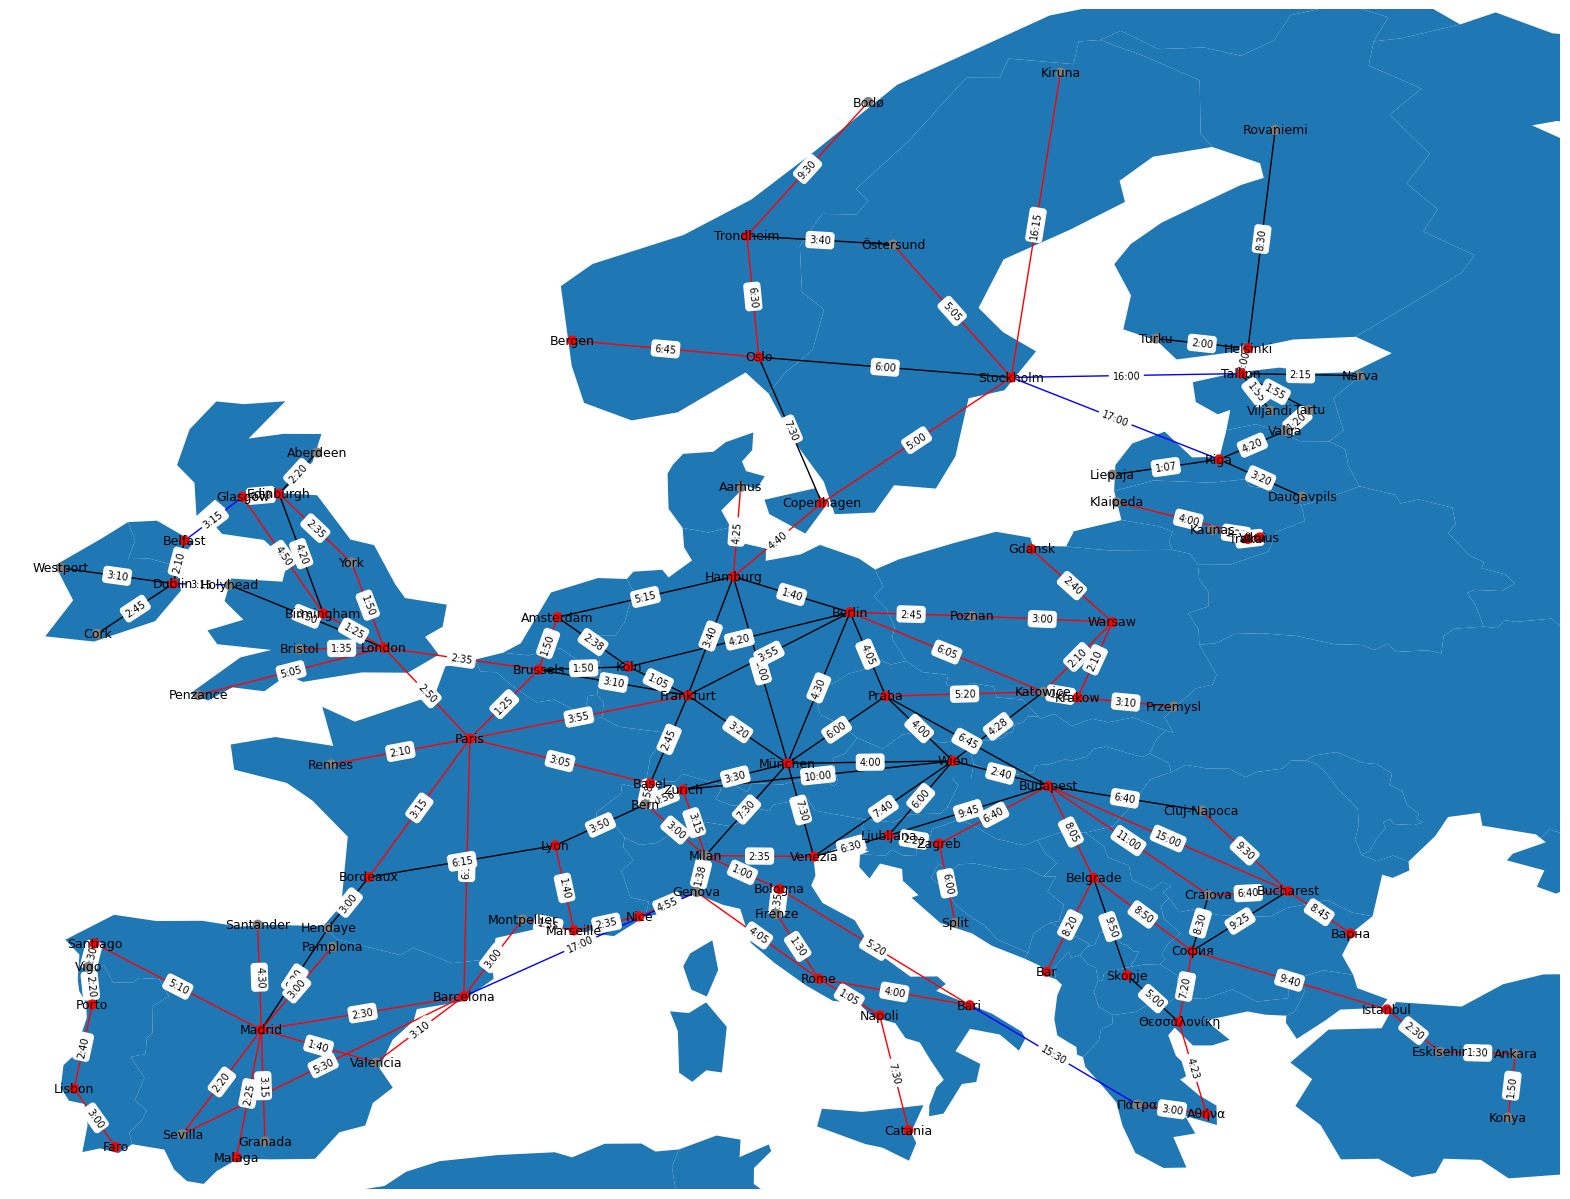

In [8]:
# plot graph using longitude and latitude features of nodes as x and y coordinates
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import contextily as cx

def plot_graph(G, paths=None, weight="time", figsize=(20, 16)):
    pos = {city: (data["long"], data["lat"]) for city, data in G.nodes(data=True)}

    # add background map
    # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = gpd.read_file("./data/map/ne_110m_admin_0_countries.shp")
    ax = world.plot(figsize=(20, 16))
    ax.set_xlim(-11, 34)
    ax.set_ylim(35.8, 70)

    # color nodes grey if they have no airport "iata_code"
    node_colors = ["red" if data["iata_code"] else "grey" for city, data in G.nodes(data=True)]

    # color edges blue if they are a ferry & red if they are a reservation
    edge_colors = [
        "blue" if data["type"] == "ferry" 
        else "red" if data["type"] == "reservation" 
        else "black" for u, v, data in G.edges(data=True)]

    # add edge feature "time" in format hh:mm to the plot
    edge_labels = {(u, v): f"{data['time']//60}:{data['time']%60:02d}" for u, v, data in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_size=40, font_size=9, node_color=node_colors, edge_color=edge_colors, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, ax=ax)

    # add paths to the plot
    if paths:
        for path in paths:
            edges = list(zip(path, path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="pink", width=2, ax=ax)

    plt.show()

plot_graph(G)

# Getting from Brussels to Belgrade

The goal of this notebook is to get from Brussels to Belgrade by train, however there are a few constraints:

1. Travel days using the Interrail pass
- The number of travel days is restricted to 4, 5, or 7
- A travel day cannot be longer than 9 hours

2. City preferences
- City nodes are weighted by preferences defined by the user
- A score is gained by visiting a city (not just passing through)
- City weights are defined by the user and relate to how long the user wants to stay in a city

3. Total travel time
- The destination (Belgrade) should be reached within the total travel time
- Total travel time is defined by the user (e.g. 12 days or 288 hours)

4. City stop
- When a travel day is over, the user must stop in a city
- A stop is a multiple of 24 hours which is subtracted from the total travel time
- A score is gained by visiting a city, but the city's weight decreases by stopping in said city

# Naive approach: Shortest path

The naive approach is to find the shortest path from Brussels to Belgrade, without taking into account city preferences. This demonstates that the destination can be reached within the total travel time.

Total time from Brussels to Belgrade: 1260 minutes


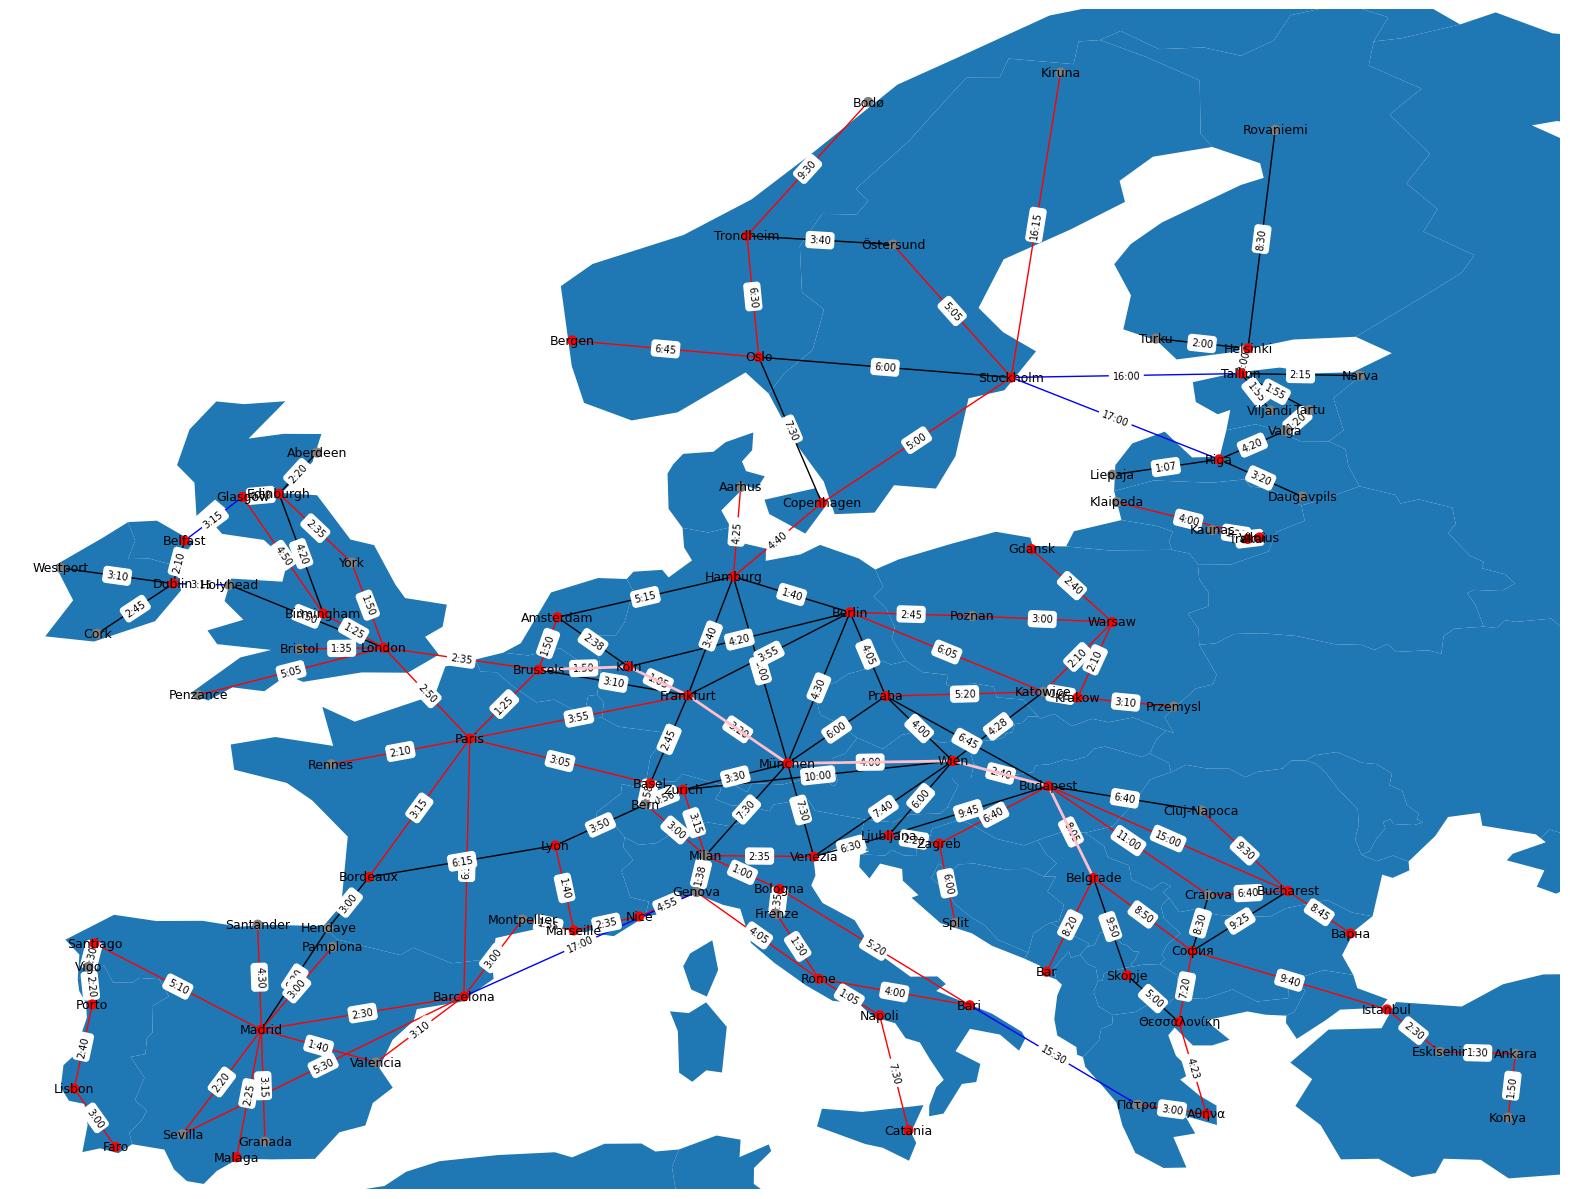

In [9]:
# shortest path from Brussels to Belgrade
def shortest_path(G, source, target, weight="time"):
    path = nx.shortest_path(G, source=source, target=target, weight=weight)
    time_sum = sum([G.edges[path[i], path[i+1]]["time"] for i in range(len(path)-1)])
    return path, time_sum

path, time_sum = shortest_path(G, "Brussels", "Belgrade")
print("Total time from Brussels to Belgrade:", time_sum, "minutes")
plot_graph(G, paths=[path])

# Formal problem definition

Given:

A graph of cities in Europe $G = (V,E)$ where:
- $V$ is the set of cities (nodes) with $\text{score}(v)$ for each city $v \in V$
- $E$ is the set of railway connections between cities (edges) with $\text{time}(e)$ for each connection $e \in E$

Objective:
- Time-restricted path from
  - Source city $S \in V$ (Brussels)
  - Destination city $D \in V$ (Belgrade)
- Maximize total city scores on path from $S$ to $D$ while $\max \sum_{v \in V} \text{score}(v)$

Constraints:
- Total travel time $T_{\text{total}}$ (17280 minutes or 12 days)
- Number of travel days $T_{\text{\#days}}$ (4, 5, or 7)
- Travel time per day $T_{\text{day}}$ (720 minutes or 12 hours)
- Stop time per city $T_{\text{stop}}$ (multiples of 1440 minutes or 24 hours)
- Each travel day must be followed by a stop in a city
- The score gained for visiting a city decreases by stopping in said city

# Setting up hyperparameters

In [11]:
# Interrail travel days constraints
travel_days = 4
travel_day_max_time = 9 * 60

# Travel destination constraints
total_travel_time = 24 * 12 * 60
start = "Brussels"
end = "Belgrade"

# Travel constraints
city_stop_time = 24 * 60
city_weights_user = {
    "Amsterdam": 2,
    "Berlin": 3,
    "Wien": 3,
    "Krakow": 2,
    "Budapest": 2,
}
city_weights_base = 1

# add "score" feature to nodes
for city, data in G.nodes(data=True):
    if city in city_weights_user:
        G.nodes[city]["score"] = city_weights_user[city]
    elif city == start:
        G.nodes[city]["score"] = 0
    else:
        G.nodes[city]["score"] = city_weights_base

In [12]:
# nx.single_source_dijkstra(G, source="Brussels", weight="time", cutoff=travel_day_max_time)

({'Brussels': 0,
  'Paris': 85,
  'Köln': 110,
  'Amsterdam': 110,
  'London': 155,
  'Frankfurt': 175,
  'Rennes': 215,
  'Birmingham': 240,
  'Bristol': 250,
  'York': 265,
  'Basel': 270,
  'Bordeaux': 280,
  'Bern': 328,
  'Berlin': 370,
  'München': 375,
  'Zurich': 384,
  'Holyhead': 385,
  'Hamburg': 395,
  'Edinburgh': 420,
  'Penzance': 460,
  'Hendaye': 460,
  'Glasgow': 470,
  'Barcelona': 475,
  'Milan': 508,
  'Poznan': 535},
 {'Brussels': ['Brussels'],
  'London': ['Brussels', 'London'],
  'Paris': ['Brussels', 'Paris'],
  'Köln': ['Brussels', 'Köln'],
  'Frankfurt': ['Brussels', 'Köln', 'Frankfurt'],
  'Amsterdam': ['Brussels', 'Amsterdam'],
  'Rennes': ['Brussels', 'Paris', 'Rennes'],
  'Bordeaux': ['Brussels', 'Paris', 'Bordeaux'],
  'Barcelona': ['Brussels', 'Paris', 'Barcelona'],
  'Basel': ['Brussels', 'Paris', 'Basel'],
  'Berlin': ['Brussels', 'Köln', 'Berlin'],
  'Hamburg': ['Brussels', 'Köln', 'Frankfurt', 'Hamburg'],
  'Holyhead': ['Brussels', 'London', 'Holyhe

In [95]:
def get_n_highest_scoring_cities(G, path, n):
    city_scores = {city: G.nodes[city]["score"] for city in path[1:-1]}
    max_scores = sorted(city_scores, key=city_scores.get, reverse=True)[:n]
    # print(max_scores)
    return max_scores


def check_proposed_path(G, proposed_path, travel_day_max_time, travel_days=4):
    path = proposed_path.copy()
    # print("before removal:", path)
    max_scores = get_n_highest_scoring_cities(G, path, n=travel_days)
    # propsed path, only including the highest scoring cities
    for city in proposed_path[1:-1]:
        if city not in max_scores:
            path.remove(city)

    # print("after removal:", path)

    # travel time between cities of proposed path
    for i, j in zip(path[:-1], path[1:]):
        _, time = shortest_path(G, i, j)
        # print(f"From {i} to {j}: {time} minutes")

        if time > travel_day_max_time:
            # print(f"Time between {i} and {j} is too long")
            return False
    return tuple(path)


def get_path_score(G, path):
    return sum([G.nodes[city]["score"] for city in path[1:-1]])


def get_first_n_simple_paths(G, source, target, travel_days=4, n_iter=100):
    simple_paths = nx.shortest_simple_paths(G, source=start, target=end, weight="time")
    possible_paths = set()
    i = 0
    for proposed_path in simple_paths:
        # print("checking path", i)
        i += 1
        path = check_proposed_path(G, proposed_path, travel_day_max_time, travel_days=travel_days)
        if path:
            score = get_path_score(G, path)
            # print(path, score)
            possible_paths.add((path, score))
        if i == n_iter:
            break
        # print("=================")
    return possible_paths


possible_paths = get_first_n_simple_paths(G, start, end, travel_days=4, n_iter=2000)

In [96]:
len(possible_paths)

26